In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.multiclass import OneVsRestClassifier

In [2]:
data = pd.read_csv("iBeacon_RSSI_Labeled.csv")
X = data[['b3001','b3002','b3003','b3004','b3005','b3006','b3007','b3008','b3009','b3010','b3011','b3012','b3013',]]
Y = data[["location"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

In [3]:
model = OneVsRestClassifier(svm.SVC())
clf = model.fit(X_train, Y_train)
print("训练集准确率：{:.4f}".format(clf.score(X_train, Y_train)))
print("测试集准确率：{:.4f}".format(clf.score(X_test, Y_test)))


训练集准确率：0.4416
测试集准确率：0.2606


In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
print("训练集准确率：{:.4f}".format(clf.score(X_train, Y_train)))
print("测试集准确率：{:.4f}".format(clf.score(X_test, Y_test)))

训练集准确率：0.6097
测试集准确率：0.3099


In [5]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
print("训练集准确率：{:.4f}".format(rfc.score(X_train, Y_train)))
print("测试集准确率：{:.4f}".format(rfc.score(X_test, Y_test)))


训练集准确率：0.6006
测试集准确率：0.3169


C:\Users\yanhuo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [6]:
data = pd.read_csv("iBeacon_RSSI_Unlabeled.csv")
X_train = data[['b3001','b3002','b3003','b3004','b3005','b3006','b3007','b3008','b3009','b3010','b3011','b3012','b3013',]]


In [7]:
tsne=TSNE()
b = tsne.fit_transform(X_train)

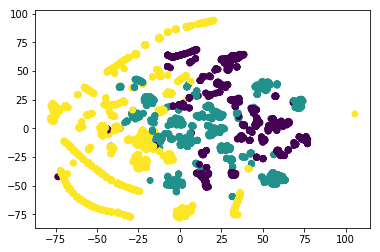

In [8]:
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_train)
plt.scatter(b[:, 0], b[:, 1], c = y_pred)
plt.show()

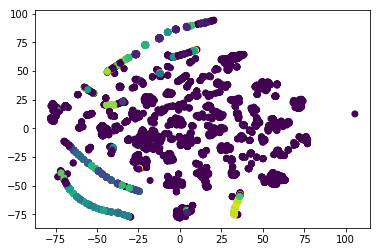

In [9]:
_y_pred = DBSCAN().fit_predict(X_train)
plt.scatter(b[:, 0], b[:, 1], c=_y_pred)
plt.show()

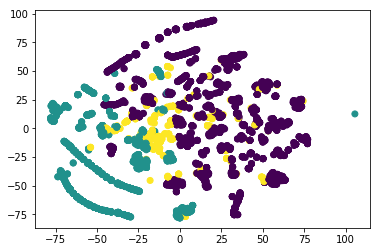

In [10]:
gmmModel = GaussianMixture(n_components=3, covariance_type='diag', random_state=0).fit(X_train)
the_y_pred = gmmModel.predict(X_train)
plt.scatter(b[:, 0], b[:, 1], c= the_y_pred)
plt.show()

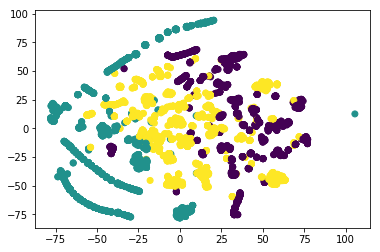

In [11]:
model = AgglomerativeClustering(n_clusters=3).fit(X_train)
plt.scatter(b[:, 0], b[:, 1], c=model.labels_)
plt.show()